# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**TASK: Run the cell below to read in the data.**

In [35]:
df = pd.read_csv("heart.csv")

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
df["target"].unique()

array([1, 0])

### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [38]:
# CODE HERE
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

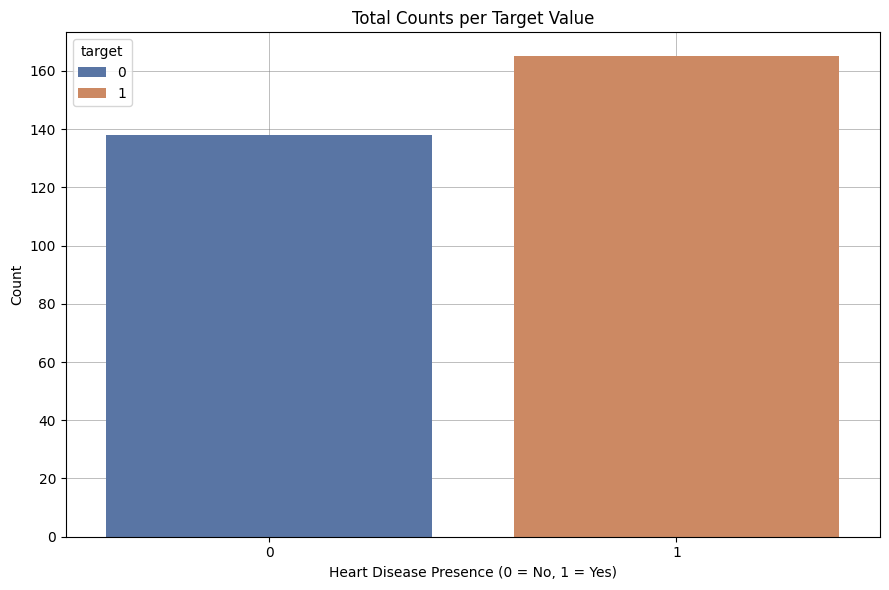

In [40]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.countplot(x="target", data=df, palette="deep", hue="target")
ax.set_xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
ax.set_ylabel("Count")
ax.set_title("Total Counts per Target Value")

ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

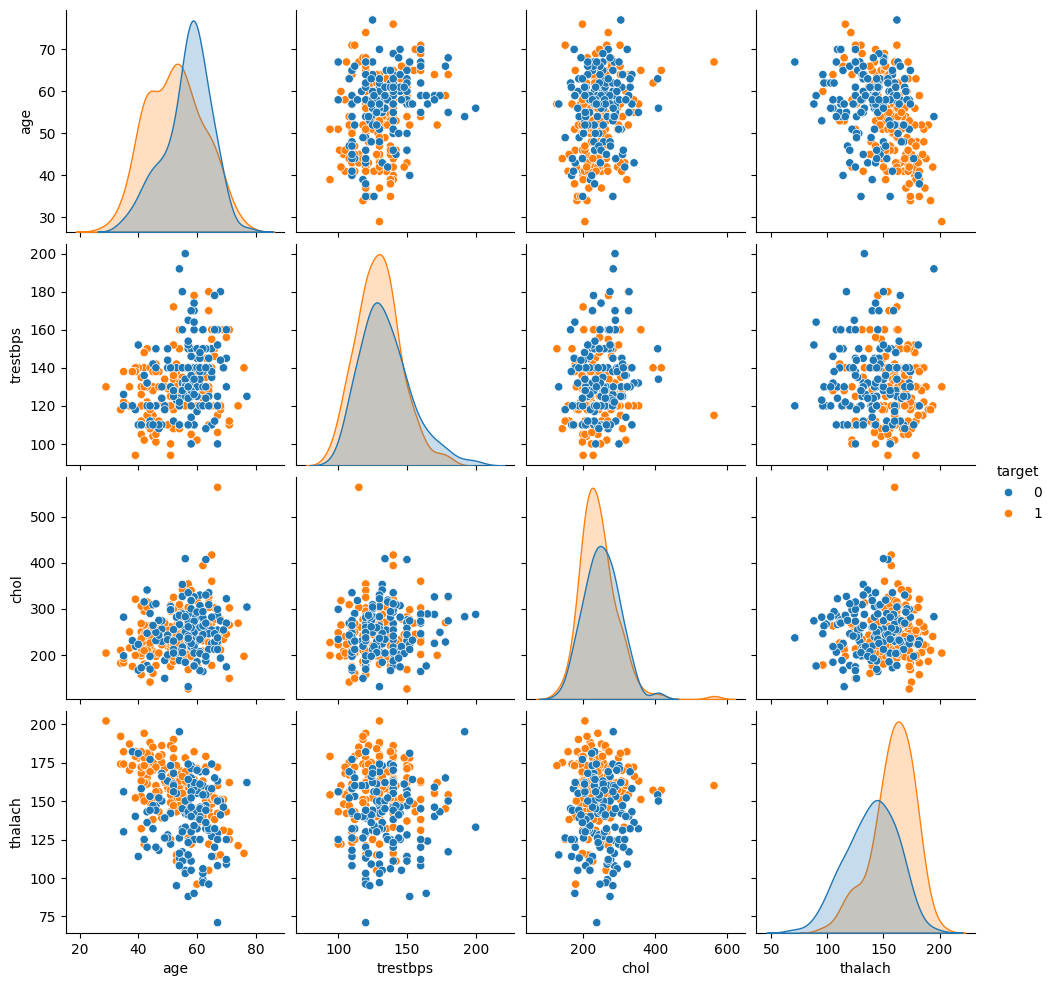

In [41]:
plot_cols = ["age", "trestbps", "chol", "thalach"]
df = df.copy()
df["target"] = df["target"].astype("category")

sns.pairplot(df, vars=plot_cols, hue="target", corner=False)
plt.show()

**TASK: Create a heatmap that displays the correlation between all the columns.**

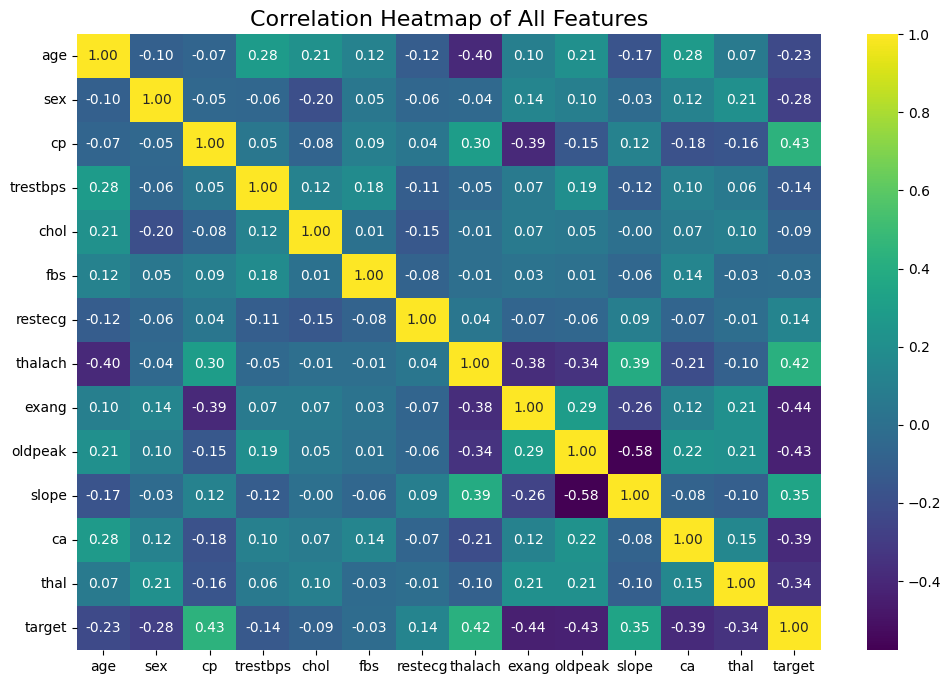

In [42]:
# Compute correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    cbar=True,
)

plt.title("Correlation Heatmap of All Features", fontsize=16)
plt.show()

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [43]:
X = df.drop("target", axis=1)
y = df["target"]

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=101
)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline combining scaling and logistic regression to prevent data leakage during cross-validation
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(max_iter=5000, solver="saga")),
    ]
)

# Define parameter grid for hyperparameter tuning: penalties (L1, L2, ElasticNet), C values (regularization strength), and solver
param_grid = [
    {
        "logreg__penalty": ["l1"],
        "logreg__C": np.logspace(-4, 4, 10),
        "logreg__solver": ["saga"],
    },
    {
        "logreg__penalty": ["l2"],
        "logreg__C": np.logspace(-4, 4, 10),
        "logreg__solver": ["saga"],
    },
    {
        "logreg__penalty": ["elasticnet"],
        "logreg__C": np.logspace(-4, 4, 10),
        "logreg__l1_ratio": [0.1, 0.5, 0.9],
        "logreg__solver": ["saga"],
    },
]

# Initialize GridSearchCV with the pipeline, parameter grid, 5-fold CV, parallel processing, and verbosity for progress tracking
grid_search = GridSearchCV(
    estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1
)

# Fit the grid search on training data to find optimal hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by grid search
print(f"Best hyperparameters found: {grid_search.best_params_}")
# Print the best cross-validation accuracy score
print(f"Best cross-validation accuracy: {grid_search.best_score_:.3f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters found: {'logreg__C': np.float64(0.046415888336127774), 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}
Best cross-validation accuracy: 0.835


**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [46]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_C = float(best_params["logreg__C"])

print("Selected model via 5-fold cross-validation with a scaling→logreg pipeline.")
print("Penalty:", best_params["logreg__penalty"])
print("Solver:", best_params["logreg__solver"])
print("C (raw float):", repr(best_C))
print("C (scientific notation):", f"{best_C:.16e}")
print("C (3 s.f. for main text):", f"{best_C:.3g}")
print("Mean CV accuracy:", f"{best_score:.3f}")

Selected model via 5-fold cross-validation with a scaling→logreg pipeline.
Penalty: l2
Solver: saga
C (raw float): 0.046415888336127774
C (scientific notation): 4.6415888336127774e-02
C (3 s.f. for main text): 0.0464
Mean CV accuracy: 0.835


### Coeffecients

**TASK: Report back the model's coefficients.**

In [47]:
print(grid_search.best_estimator_.named_steps["logreg"].coef_)

[[-0.09619757 -0.39457391  0.53537738 -0.13850118 -0.08830385  0.02495713
   0.08081592  0.29914814 -0.33438658 -0.35236238  0.2509539  -0.49739554
  -0.37452056]]


BONUS TASK: We didn't show this in the lecture notebooks, but you have the skills to do this! Create a visualization of the coefficients by using a barplot of their values. Even more bonus points if you can figure out how to sort the plot! If you get stuck on this, feel free to quickly view the solutions notebook for hints, there are many ways to do this, the solutions use a combination of pandas and seaborn.

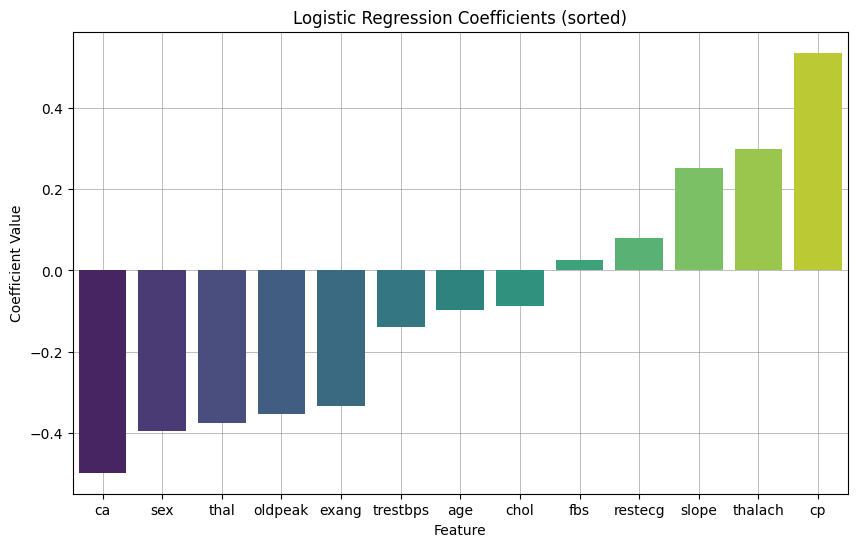

In [62]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Extract feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Extract coefficients from the logistic regression inside the pipeline
coefficients = best_model.named_steps["logreg"].coef_[0]

# Create a DataFrame with features and coefficients
coef_df = pd.DataFrame({"feature": feature_names, "coefficient": coefficients})

# Sort by coefficient values
coef_df = coef_df.sort_values(by="coefficient")

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x="feature", y="coefficient", data=coef_df, palette="viridis", hue="feature"
)
ax.set(
    title="Logistic Regression Coefficients (sorted)",
    xlabel="Feature",
    ylabel="Coefficient Value",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set_axisbelow(True)
plt.show()

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [66]:
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
display(cm)

array([[12,  3],
       [ 2, 14]])

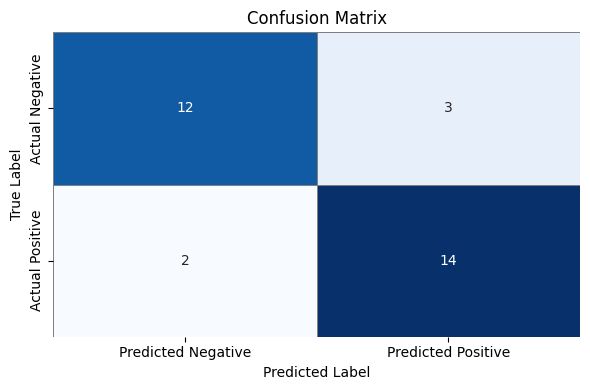

In [67]:
# Wrap in DataFrame for labelled axes
cm_df = pd.DataFrame(
    cm,
    index=["Actual Negative", "Actual Positive"],
    columns=["Predicted Negative", "Predicted Positive"],
)

# Plot with seaborn
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(
    cm_df,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    linewidths=0.5,
    linecolor="grey",
)
ax.set(title="Confusion Matrix", ylabel="True Label", xlabel="Predicted Label")
plt.tight_layout()
plt.show()

In [68]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



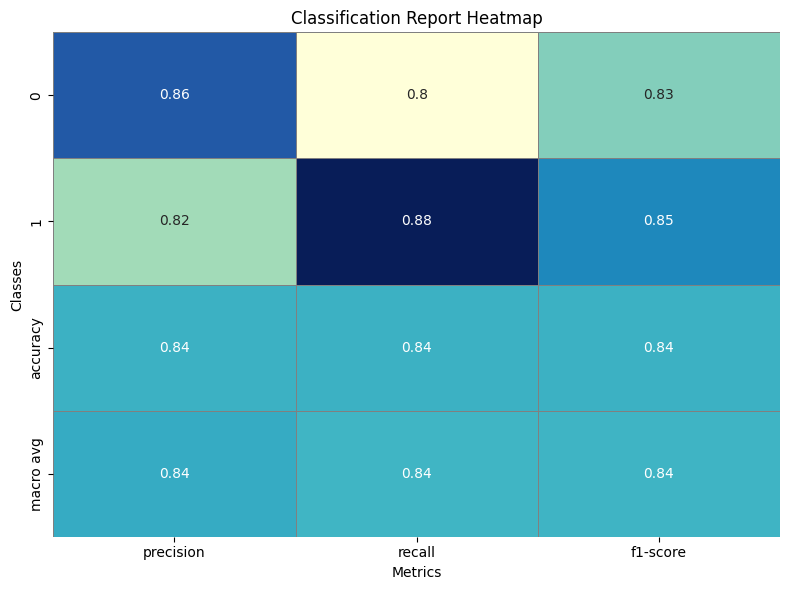

In [69]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    report_df.iloc[:-1, :-1],  # skip 'accuracy' row and 'support' column
    annot=True,
    cmap="YlGnBu",
    cbar=False,
    linewidths=0.5,
    linecolor="grey",
)
ax.set(title="Classification Report Heatmap", ylabel="Classes", xlabel="Metrics")

plt.tight_layout()
plt.show()

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

In [72]:
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    roc_auc_score,
)

# Compute predicted probabilities for the positive class
y_score = grid_search.predict_proba(X_test)[:, 1]

# Compute metrics
precision, recall, _ = precision_recall_curve(y_test, y_score)
ap = average_precision_score(y_test, y_score)

fpr, tpr, _ = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)
pos_rate = y_test.astype(int).mean()

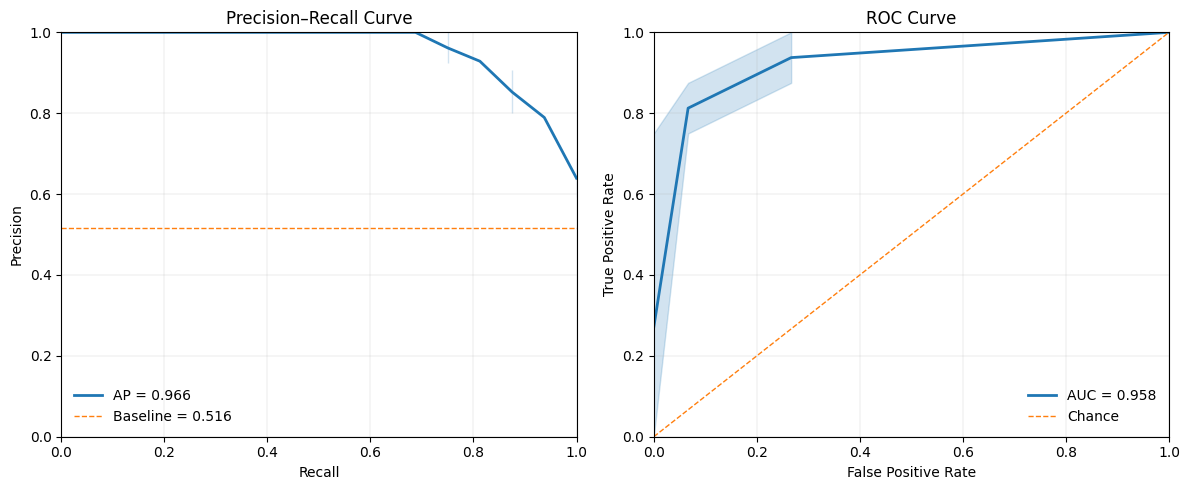

In [73]:
# Create figure with 2 axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Precision–Recall curve
sns.lineplot(x=recall, y=precision, ax=axes[0], linewidth=2, label=f"AP = {ap:.3f}")
sns.lineplot(
    x=[0, 1],
    y=[pos_rate, pos_rate],
    ax=axes[0],
    linestyle="--",
    linewidth=1,
    label=f"Baseline = {pos_rate:.3f}",
)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel("Recall")
axes[0].set_ylabel("Precision")
axes[0].set_title("Precision–Recall Curve")
axes[0].legend(loc="lower left", frameon=False)
axes[0].grid(True, linewidth=0.3, alpha=0.6)

# ROC curve
sns.lineplot(x=fpr, y=tpr, ax=axes[1], linewidth=2, label=f"AUC = {auc:.3f}")
sns.lineplot(
    x=[0, 1], y=[0, 1], ax=axes[1], linestyle="--", linewidth=1, label="Chance"
)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve")
axes[1].legend(loc="lower right", frameon=False)
axes[1].grid(True, linewidth=0.3, alpha=0.6)

plt.tight_layout()
plt.show()

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [76]:
patient = [[54.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0]]

In [77]:
patient = pd.DataFrame(
    [[54.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0]],
    columns=X_train.columns,
)

In [78]:
patient_predict = grid_search.best_estimator_.predict(patient)
print("Predicted class:", patient_predict[0])

Predicted class: 0


In [79]:
# Predict probability ("how sure" the model is)
patient_proba = grid_search.best_estimator_.predict_proba(patient)
print("Class probabilities:", patient_proba[0])

Class probabilities: [0.94750893 0.05249107]


## Great Job!